# Imports and functions

In [206]:
import os

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [207]:
def read_store_data(file_name="revenue_test_dataset_by_date_store.csv"):
    df = read_data(file_name)
    df = df.drop(columns=["Unnamed: 0"])
    df = df.sort_values(by=["store_id", "date"])
    df["date"] = pd.to_datetime(df["date"])
    df = df.reset_index(drop=True)
    return df


def read_data(file_name):
    current_dir = os.getcwd()
    project_dir = os.path.dirname(os.path.dirname(current_dir))
    data_path = os.path.join(project_dir, "Datasets", file_name)
    df = pd.read_csv(data_path)
    return df

In [208]:
revenue = read_store_data(file_name="revenue_test_dataset_by_date_store.csv")
revenue


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,10933.16
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,CA_1,9787.06
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,CA_1,7201.38
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,CA_1,7407.74
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,CA_1,6566.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,2016-05-18,11616,Wednesday,5,5,2016,d_1937,NaN,NaN,NaN,NaN,0,0,0,WI_3,9163.29
19406,2016-05-19,11616,Thursday,6,5,2016,d_1938,NaN,NaN,NaN,NaN,0,0,0,WI_3,9660.13
19407,2016-05-20,11616,Friday,7,5,2016,d_1939,NaN,NaN,NaN,NaN,0,0,0,WI_3,11982.37
19408,2016-05-21,11617,Saturday,1,5,2016,d_1940,NaN,NaN,NaN,NaN,0,0,0,WI_3,12370.23


# Sample store: CA_1

In [209]:
store_name = "CA_1"

In [210]:
store_data = revenue[revenue["store_id"] == store_name]
store_data


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,10933.16
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,CA_1,9787.06
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,CA_1,7201.38
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,CA_1,7407.74
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,CA_1,6566.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,11616,Wednesday,5,5,2016,d_1937,NaN,NaN,NaN,NaN,0,0,0,CA_1,12920.62
1937,2016-05-19,11616,Thursday,6,5,2016,d_1938,NaN,NaN,NaN,NaN,0,0,0,CA_1,13259.90
1938,2016-05-20,11616,Friday,7,5,2016,d_1939,NaN,NaN,NaN,NaN,0,0,0,CA_1,13999.65
1939,2016-05-21,11617,Saturday,1,5,2016,d_1940,NaN,NaN,NaN,NaN,0,0,0,CA_1,18637.70


# EDA

## Basic statistics

In [211]:
# Basic statistics
print("Basic Statistics:")
print(store_data["revenue"].describe())


Basic Statistics:
count     1941.000000
mean     11826.009155
std       3213.150681
min          0.000000
25%       9609.940000
50%      11516.600000
75%      13656.790000
max      22218.080000
Name: revenue, dtype: float64


In [212]:
# Check for missing values
print("\nMissing Values:")
print(store_data.isnull().sum())



Missing Values:
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1783
event_type_1    1783
event_name_2    1937
event_type_2    1937
snap_CA            0
snap_TX            0
snap_WI            0
store_id           0
revenue            0
dtype: int64


## Cyclicality / Sesasonality

In [213]:
# Create subplots for different analyses
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        "Daily Revenue",
        "Weekly Average Revenue",
        "Monthly Average Revenue",
    ),
    vertical_spacing=0.1,
)

# Daily revenue
fig.add_trace(
    go.Scatter(
        x=store_data["date"],
        y=store_data["revenue"],
        mode="lines",
        name="Daily Revenue",
    ),
    row=1,
    col=1,
)

# Weekly average
weekly_avg = store_data.groupby("wm_yr_wk")["revenue"].mean().reset_index()
fig.add_trace(
    go.Scatter(
        x=store_data.groupby("wm_yr_wk").first()["date"],
        y=weekly_avg["revenue"],
        mode="lines",
        name="Weekly Average",
    ),
    row=2,
    col=1,
)

# Monthly average
monthly_avg = store_data.groupby(["year", "month"])["revenue"].mean().reset_index()
monthly_dates = store_data.groupby(["year", "month"]).first()["date"]
fig.add_trace(
    go.Scatter(
        x=monthly_dates, y=monthly_avg["revenue"], mode="lines", name="Monthly Average"
    ),
    row=3,
    col=1,
)

# Update layout with height parameter
fig.update_layout(
    height=1200, title_text="Revenue Analysis for CA_1 Store", showlegend=True
)

fig.show()

In [214]:
# Analyze seasonality
# Day of week patterns
# Create a mapping for correct weekday order
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Calculate average revenue by weekday and reorder
dow_avg = store_data.groupby("weekday")["revenue"].mean().reset_index()
dow_avg["weekday"] = pd.Categorical(
    dow_avg["weekday"], categories=weekday_order, ordered=True
)
dow_avg = dow_avg.sort_values("weekday")

fig = px.bar(dow_avg, x="weekday", y="revenue", title="Average Revenue by Day of Week")
fig.show()


In [215]:
# Monthly patterns
monthly_avg = store_data.groupby("month")["revenue"].mean().reset_index()
fig = px.bar(monthly_avg, x="month", y="revenue", title="Average Revenue by Month")
fig.show()


## Event analysis


In [216]:
# Create a copy of the dataframe
store_events = store_data.copy()

# Create separate rows for each event
events_df1 = store_data[store_data["event_name_1"].notna()][
    ["date", "revenue", "event_name_1"]
].rename(columns={"event_name_1": "event"})
events_df2 = store_data[store_data["event_name_2"].notna()][
    ["date", "revenue", "event_name_2"]
].rename(columns={"event_name_2": "event"})
events_combined = pd.concat([events_df1, events_df2], ignore_index=True)

# Add No Event days
no_event_days = store_data[
    store_data["event_name_1"].isna() & store_data["event_name_2"].isna()
].copy()
no_event_days["event"] = "No Event"
no_event_days = no_event_days[["date", "revenue", "event"]]

# Combine all events and no-event days
all_events = pd.concat([events_combined, no_event_days], ignore_index=True)

# Calculate impact for all events
event_impact = (
    all_events.groupby("event")["revenue"].agg(["mean", "count"]).reset_index()
)

# Sort by mean revenue in descending order
event_impact = event_impact.sort_values("mean", ascending=False)

# Create color list where No Event is a different color
colors = ["#1f77b4" if x != "No Event" else "#ff7f0e" for x in event_impact["event"]]

# Create bar plot
fig = px.bar(
    event_impact,
    x="event",
    y="mean",
    text=event_impact["count"].apply(lambda x: f"n={x}"),  # Add count as text on bars
    title="Average Revenue by Event Type (Including Non-Event Days)",
    labels={"mean": "Average Revenue", "event": "Event Type"},
)

# Update traces with colors and text position
fig.update_traces(marker_color=colors, textposition="auto")

# Improve readability of x-axis labels
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

In [217]:
# Get all events from both columns
events_df1 = store_data[store_data["event_name_1"].notna()][
    ["date", "event_name_1"]
].rename(columns={"event_name_1": "event"})
events_df2 = store_data[store_data["event_name_2"].notna()][
    ["date", "event_name_2"]
].rename(columns={"event_name_2": "event"})
event_dates = pd.concat([events_df1, events_df2], ignore_index=True).drop_duplicates()
event_types = event_dates["event"].unique()

# Calculate average weekly revenue for each event type
event_weekly_avg = []
for event_type in event_types:
    # Get all dates for this event type
    event_type_dates = event_dates[event_dates["event"] == event_type]["date"].unique()

    # Calculate weekly revenue for each occurrence of this event
    event_revenues = []
    for event_date in event_type_dates:
        week_end = pd.to_datetime(event_date)
        week_start = week_end - pd.Timedelta(days=6)
        weekly_rev = store_data[
            (store_data["date"] >= week_start) & (store_data["date"] <= week_end)
        ]["revenue"].sum()
        event_revenues.append(weekly_rev)

    # Calculate average weekly revenue for this event type
    avg_weekly_rev = np.mean(event_revenues)
    event_weekly_avg.append(
        {
            "event": event_type,
            "week_ending": pd.NaT,
            "weekly_revenue": avg_weekly_rev,
            "occurrences": len(event_revenues),
        }
    )

event_weekly_df = pd.DataFrame(event_weekly_avg)

# Calculate average weekly revenue for non-event weeks
non_event_weekly = []
current_date = store_data["date"].min()
end_date = store_data["date"].max()

while current_date <= end_date:
    week_end = current_date + pd.Timedelta(days=6)
    # Skip if week overlaps with any event date
    if not any(
        (week_end >= pd.to_datetime(ed)) & (current_date <= pd.to_datetime(ed))
        for ed in event_dates["date"].unique()
    ):
        weekly_rev = store_data[
            (store_data["date"] >= current_date) & (store_data["date"] <= week_end)
        ]["revenue"].sum()
        non_event_weekly.append(weekly_rev)
    current_date += pd.Timedelta(days=7)

avg_non_event = np.mean(non_event_weekly)

# Create a separate DataFrame for non-event average with matching columns
non_event_df = pd.DataFrame(
    [
        {
            "event": "Average Non-Event Week",
            "week_ending": pd.NaT,
            "weekly_revenue": avg_non_event,
            "occurrences": len(non_event_weekly),
        }
    ]
)

# Ensure both DataFrames have the same dtypes before concatenation
for col in event_weekly_df.columns:
    non_event_df[col] = non_event_df[col].astype(event_weekly_df[col].dtype)

# Concatenate the DataFrames
event_weekly_df = pd.concat([event_weekly_df, non_event_df], ignore_index=True)

# Sort by weekly revenue in descending order
event_weekly_df = event_weekly_df.sort_values("weekly_revenue", ascending=False)

# Add occurrence text
event_weekly_df["text"] = event_weekly_df["occurrences"].apply(lambda x: f"n={x}")

# Create bar plot with text included
fig = px.bar(
    event_weekly_df,
    x="event",
    y="weekly_revenue",
    text="text",  # Add the occurrence counts as text
    title="Average Weekly Revenue by Event Type vs Non-Event Weeks",
    labels={"weekly_revenue": "Average Weekly Revenue", "event": "Event Type"},
)

# Color the average non-event bar differently
colors = [
    "#1f77b4" if x != "Average Non-Event Week" else "#ff7f0e"
    for x in event_weekly_df["event"]
]
fig.update_traces(marker_color=colors, textposition="auto")

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

## Snap

In [218]:
# SNAP analysis
snap_impact = store_data.groupby("snap_CA")["revenue"].mean().reset_index()
fig = px.bar(
    snap_impact,
    x="snap_CA",
    y="revenue",
    title="Average Revenue on SNAP vs Non-SNAP Days (California)",
    labels={"snap_CA": "SNAP Day", "revenue": "Average Revenue"},
)

# Update x-axis labels
fig.update_xaxes(ticktext=["Non-SNAP Day", "SNAP Day"], tickvals=[0, 1])

fig.show()


# Tests for stationarity

In [219]:
data = revenue[["date", "revenue", "store_id"]]

data


,date,revenue,store_id
0,2011-01-29,10933.16,CA_1
1,2011-01-30,9787.06,CA_1
2,2011-01-31,7201.38,CA_1
3,2011-02-01,7407.74,CA_1
4,2011-02-02,6566.12,CA_1
...,...,...,...
19405,2016-05-18,9163.29,WI_3
19406,2016-05-19,9660.13,WI_3
19407,2016-05-20,11982.37,WI_3
19408,2016-05-21,12370.23,WI_3


In [220]:
data = data.pivot(index="date", columns="store_id", values="revenue")
data.fillna(0, inplace=True)
data.index = data.index.date
data


store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-01-29,10933.16,9101.52,11679.83,4561.59,6586.68,9915.78,7597.99,6454.72,5451.46,9367.88
2011-01-30,9787.06,8417.53,12161.46,4681.41,6610.60,9804.54,7356.54,5645.77,4636.86,9868.80
2011-01-31,7201.38,5320.51,9123.86,3637.98,4551.97,6651.16,5406.70,3640.12,4621.58,7551.65
2011-02-01,7407.74,5550.56,10249.78,3708.92,5374.39,6985.60,5597.97,2949.96,5754.75,7181.53
2011-02-02,6566.12,5229.72,9538.65,3841.14,4347.07,6039.05,4069.74,2.96,2679.19,4646.31
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,12920.62,12766.25,17780.83,8116.41,9851.97,11121.03,12078.07,9605.89,12928.75,9163.29
2016-05-19,13259.90,13432.94,18635.35,8367.57,8403.09,10474.33,11196.76,10478.86,13547.39,9660.13
2016-05-20,13999.65,15545.28,18219.23,8960.17,11296.88,13832.01,14667.00,11358.75,14139.33,11982.37
2016-05-21,18637.70,24088.59,23849.52,9768.51,13137.35,15212.81,15696.64,14614.05,15020.25,12370.23


## Stationarity test

In [92]:
store_ids = list(revenue["store_id"].unique())
store_ids

['CA_1',
 'CA_2',
 'CA_3',
 'CA_4',
 'TX_1',
 'TX_2',
 'TX_3',
 'WI_1',
 'WI_2',
 'WI_3']

In [93]:
sample_store = data[store_ids[0]]
sample_store

date
2011-01-29    10933.16
2011-01-30     9787.06
2011-01-31     7201.38
2011-02-01     7407.74
2011-02-02     6566.12
                ...   
2016-05-18    12920.62
2016-05-19    13259.90
2016-05-20    13999.65
2016-05-21    18637.70
2016-05-22    21110.44
Name: CA_1, Length: 1941, dtype: float64

In [94]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning

# Suppress only the InterpolationWarning
warnings.filterwarnings("ignore", category=InterpolationWarning)


def test_stationarity(data, store_ids):
    # Initialize an empty list to store results
    stationary_test_results = []

    for store in store_ids:
        store_data = data[store]

        # ADF Test
        # p-values < 0.05 means stationary
        adf_result = adfuller(store_data)
        adf_stat = adf_result[0]
        adf_p_value = adf_result[1]

        # KPSS Test
        # p-value < 0.05 means NON stationary (unit root)
        kpss_result = kpss(store_data)
        kpss_stat = kpss_result[0]
        kpss_p_value = kpss_result[1]

        # Append results as a dictionary
        stationary_test_results.append(
            {
                "Store": store,
                "ADF Statistic": adf_stat,
                "ADF p-value": adf_p_value,
                "KPSS Statistic": kpss_stat,
                "KPSS p-value": kpss_p_value,
            }
        )

    # Create a DataFrame from the results
    stationary_test_results_df = pd.DataFrame(stationary_test_results)

    # Set 'Store' as the index
    stationary_test_results_df.set_index("Store", inplace=True)

    return stationary_test_results_df

In [169]:
# No series meet the stationarity requirement
data_stationarity_results = test_stationarity(data, store_ids)

In [170]:
data_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-1.234819,0.658441,9.264258,0.01
CA_2,1.172313,0.995789,4.953687,0.01
CA_3,-1.719435,0.421128,6.816336,0.01
CA_4,-0.624769,0.865286,6.695716,0.01
TX_1,-1.131784,0.702232,7.237055,0.01
TX_2,-1.776754,0.392062,5.677841,0.01
TX_3,-0.396309,0.910713,6.886589,0.01
WI_1,-0.822385,0.812458,7.249117,0.01
WI_2,-0.684915,0.850618,6.186655,0.01


# Modeling - VAR / VARMA / VARMAX

In [97]:
# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


## VAR

In [98]:
var_data = np.log(data + 1).diff().dropna()
var_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-01-30,-0.110729,-0.078116,0.040405,0.025922,0.003624,-0.011281,-0.032290,-0.133883,-0.161814,0.052086
2011-01-31,-0.306752,-0.458678,-0.287352,-0.252110,-0.373046,-0.388006,-0.307902,-0.438792,-0.003300,-0.267581
2011-02-01,0.028249,0.042322,0.116351,0.019307,0.166051,0.049052,0.034759,-0.210161,0.219246,-0.050247
2011-02-02,-0.120585,-0.059530,-0.071897,0.035019,-0.212099,-0.145582,-0.318758,-6.613642,-0.764312,-0.435363
2011-02-03,0.190685,0.090098,0.087143,-0.115962,0.442890,0.325553,0.524352,7.054495,0.672677,0.770027
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,0.037330,-0.002387,-0.032716,-0.085465,-0.070748,-0.127338,-0.104285,-0.052241,-0.051564,-0.048334
2016-05-19,0.025918,0.050901,0.046937,0.030472,-0.159054,-0.059905,-0.075760,0.086975,0.046737,0.052796
2016-05-20,0.054284,0.146037,-0.022581,0.068418,0.295897,0.278035,0.269954,0.080621,0.042763,0.215409


### Stationarity test

In [99]:
var_stationarity_results = test_stationarity(var_data, store_ids)

In [100]:
var_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-16.676226,1.529969e-29,0.028786,0.1
CA_2,-15.802805,1.069096e-28,0.053822,0.1
CA_3,-16.292454,3.327805e-29,0.027732,0.1
CA_4,-15.367938,3.540146e-28,0.048453,0.1
TX_1,-16.750414,1.335376e-29,0.033711,0.1
TX_2,-16.520882,2.064794e-29,0.036121,0.1
TX_3,-16.666214,1.558866e-29,0.035767,0.1
WI_1,-15.483992,2.534745e-28,0.041436,0.1
WI_2,-19.121408,0.000000e+00,0.170398,0.1


### Modeling

In [101]:
var_model = VAR(var_data, freq="D")


In [102]:
# results = model.fit(maxlags=100, ic="aic")
var_model_fit = var_model.fit(20)
var_model_fit

In [103]:
var_lag_order = var_model_fit.k_ar
var_lag_order

20

In [104]:
var_predictions = var_model_fit.forecast(var_data.values[-var_lag_order:], 28)
var_predictions

array([[-0.55220687, -0.55407796, -0.43825865, -0.37000809, -0.52985157,
        -0.50107726, -0.37620025, -0.57321311, -0.28725315, -0.47378177],
       [ 0.09758355,  0.04836864,  0.09958804,  0.11414646,  0.11955742,
         0.04821839,  0.08408836,  0.1592272 ,  0.11855729,  0.11050215],
       [-0.49105889, -0.34243609, -0.4683553 , -0.47711305, -0.45598671,
        -0.34025091, -0.43133945, -0.4020155 , -0.36261621, -0.38749047],
       [ 0.38002125,  0.32034748,  0.31290231,  0.31854443,  0.41458658,
         0.3415669 ,  0.37744721,  0.39852956,  0.34923699,  0.36424311],
       [ 0.12845418,  0.16238175,  0.06520407,  0.05639534,  0.00658734,
         0.04960006,  0.03609352,  0.1669108 ,  0.00151632,  0.07106826],
       [ 0.20137669,  0.25162031,  0.18368554,  0.09404198,  0.16330406,
         0.1339513 ,  0.09860531,  0.17661204,  0.15695349,  0.19767381],
       [ 0.0927661 ,  0.0088061 ,  0.08548598,  0.12210486,  0.11852841,
         0.10973749,  0.09409291, -0.09225741

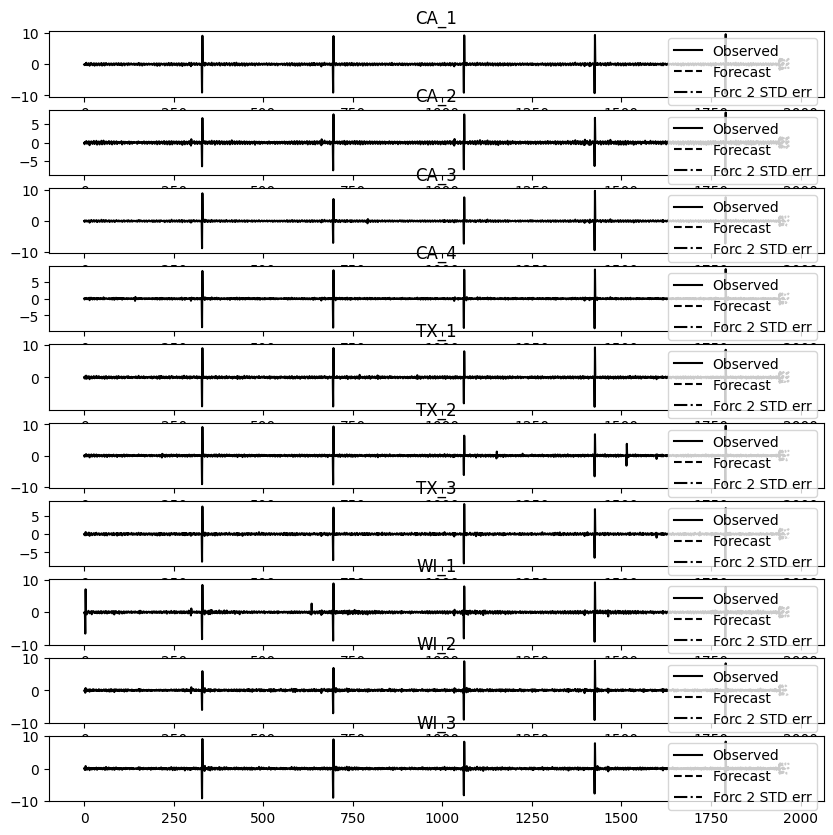

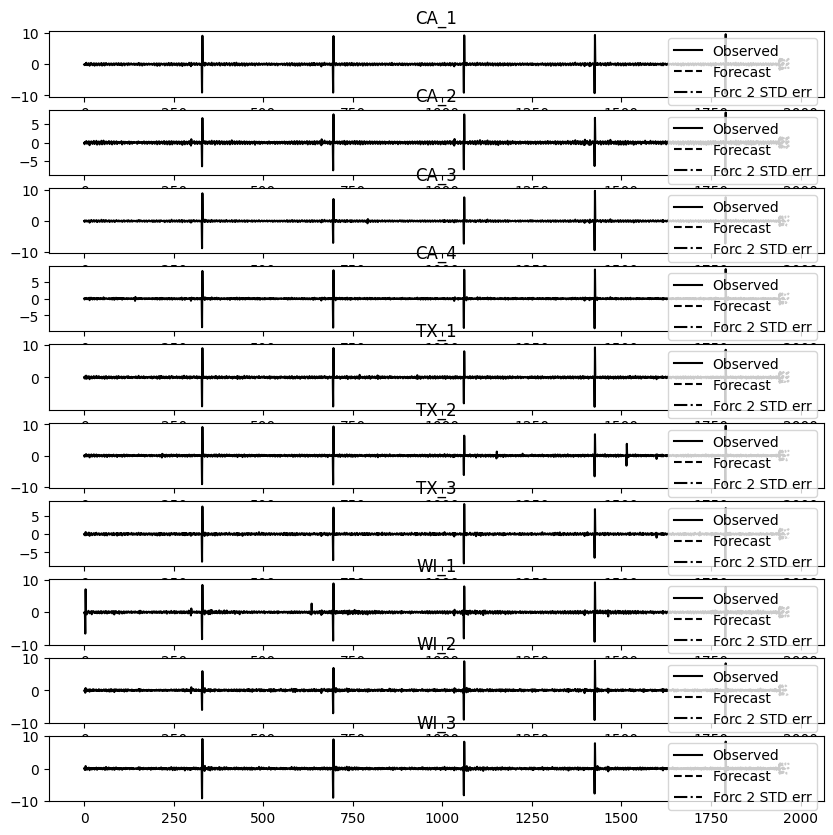

In [105]:
var_model_fit.plot_forecast(28)

In [106]:
var_predictions

array([[-0.55220687, -0.55407796, -0.43825865, -0.37000809, -0.52985157,
        -0.50107726, -0.37620025, -0.57321311, -0.28725315, -0.47378177],
       [ 0.09758355,  0.04836864,  0.09958804,  0.11414646,  0.11955742,
         0.04821839,  0.08408836,  0.1592272 ,  0.11855729,  0.11050215],
       [-0.49105889, -0.34243609, -0.4683553 , -0.47711305, -0.45598671,
        -0.34025091, -0.43133945, -0.4020155 , -0.36261621, -0.38749047],
       [ 0.38002125,  0.32034748,  0.31290231,  0.31854443,  0.41458658,
         0.3415669 ,  0.37744721,  0.39852956,  0.34923699,  0.36424311],
       [ 0.12845418,  0.16238175,  0.06520407,  0.05639534,  0.00658734,
         0.04960006,  0.03609352,  0.1669108 ,  0.00151632,  0.07106826],
       [ 0.20137669,  0.25162031,  0.18368554,  0.09404198,  0.16330406,
         0.1339513 ,  0.09860531,  0.17661204,  0.15695349,  0.19767381],
       [ 0.0927661 ,  0.0088061 ,  0.08548598,  0.12210486,  0.11852841,
         0.10973749,  0.09409291, -0.09225741

In [107]:
last_actual_value = data.iloc[[-1], :]
last_actual_value = np.log(last_actual_value + 1)
last_actual_value

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2016-05-22,9.95757,9.99972,10.213793,9.381268,9.591959,9.777517,9.750635,9.637825,9.603902,9.505533


In [108]:
var_processed_prediction = pd.DataFrame(var_predictions)
var_processed_prediction.columns = data.columns
var_processed_prediction = (
    np.exp(pd.concat([last_actual_value, var_processed_prediction]).cumsum()) - 1
)
var_processed_prediction = var_processed_prediction.iloc[1:,]
var_processed_prediction

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
0,12152.390703,12651.904581,17596.895915,8193.840338,8621.305947,10682.324938,11782.258469,8642.920229,11120.651793,8363.494202
1,13398.156483,13278.950793,19439.672447,9184.729953,9716.321208,11210.079158,12815.944775,10134.898291,12520.549410,9340.791235
2,8198.989453,9428.276285,12169.464704,5699.410177,6158.054524,7976.711523,8325.378909,6779.615688,8712.163259,6339.816484
3,11989.972964,12988.831148,16640.746681,7837.774909,9322.236744,11224.842634,12143.493593,10099.626663,12354.136513,9126.124089
4,13633.567417,15279.058008,17762.014621,8292.548338,9383.854789,11795.685012,12589.837789,11934.393944,12372.885006,9798.377910
5,16675.240431,19650.799054,21343.711427,9110.340821,11048.677658,13486.588056,13894.634194,14239.931331,14475.717850,11940.177390
6,18296.255568,19824.618970,23248.647838,10293.654133,12439.156482,15050.946930,15265.602697,12984.883651,14043.854927,11460.239442
7,14554.020785,14111.281517,19932.055843,9212.740609,9895.061103,12271.068787,13198.282281,9911.300085,12475.616698,9573.615034
8,11835.659513,11960.712685,17437.210532,7846.593214,8516.212150,10138.418769,11688.869609,9419.267308,13407.838314,8994.900157
9,15949.925684,15533.496391,23203.221795,10412.984805,11906.619196,13676.674828,14716.251137,12807.919388,18219.779973,11897.556163


<Axes: >

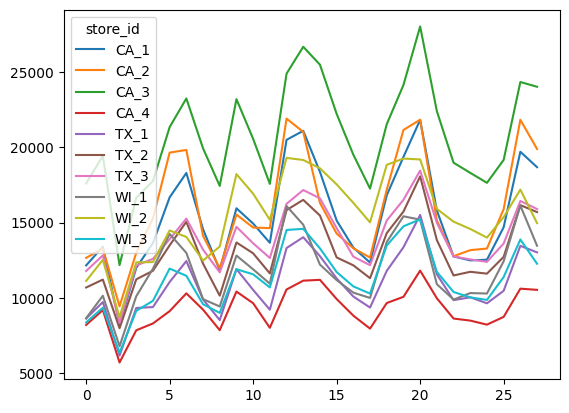

In [109]:
var_processed_prediction.plot()

In [111]:
full_var_data = pd.concat([data, var_processed_prediction])
full_var_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-01-29 00:00:00,10933.160000,9101.520000,11679.830000,4561.590000,6586.680000,9915.780000,7597.990000,6454.720000,5451.460000,9367.880000
2011-01-30 00:00:00,9787.060000,8417.530000,12161.460000,4681.410000,6610.600000,9804.540000,7356.540000,5645.770000,4636.860000,9868.800000
2011-01-31 00:00:00,7201.380000,5320.510000,9123.860000,3637.980000,4551.970000,6651.160000,5406.700000,3640.120000,4621.580000,7551.650000
2011-02-01 00:00:00,7407.740000,5550.560000,10249.780000,3708.920000,5374.390000,6985.600000,5597.970000,2949.960000,5754.750000,7181.530000
2011-02-02 00:00:00,6566.120000,5229.720000,9538.650000,3841.140000,4347.070000,6039.050000,4069.740000,2.960000,2679.190000,4646.310000
...,...,...,...,...,...,...,...,...,...,...
23,12485.208146,13166.016694,18304.235051,8483.227698,10031.279340,11726.883555,12549.949713,10313.357808,14574.479996,10028.500683
24,12529.926954,13273.090301,17641.485135,8214.227179,9633.012217,11604.236574,12387.656428,10282.792874,13999.528946,9856.577041
25,14686.698657,15893.098859,19162.058935,8731.009537,10463.484919,12718.677469,13607.726826,12425.600767,15359.987766,11377.897692
26,19705.129473,21831.654271,24341.021074,10606.205030,13452.027041,16158.114827,16433.332967,16129.433566,17190.899995,13874.812872


<Axes: >

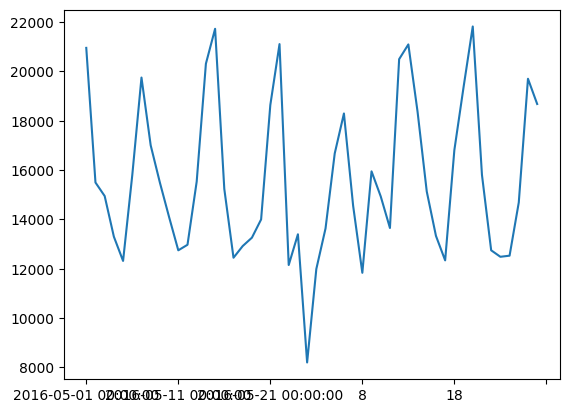

In [112]:
full_var_data.iloc[-50:,].loc[:, "CA_1"].plot()

### Post-estimation analysis


In [158]:
# Get normality test results
var_normality_test = var_model_fit.test_normality()
print(var_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     1.091e+07          31.41   0.000 20
----------------------------------------


In [168]:
var_whiteness_test = var_model_fit.test_whiteness(nlags=21)
print(var_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 21 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         579.3          124.3   0.000 100
-----------------------------------------


## VARMA


In [117]:
MA_PERIOD = 7

In [118]:
varma_ma_data = data.rolling(MA_PERIOD).mean().dropna(how="all").fillna(0)
varma_ma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-02-04,8341.135714,6634.535714,10685.847143,3973.905714,5525.195714,7766.785714,5980.785714,4171.970000,4849.608571,8386.755714
2011-02-05,8690.027143,6819.577143,10977.537143,4035.235714,5616.621429,7752.821429,5883.680000,4371.668571,4976.931429,8877.731429
2011-02-06,8804.937143,6801.108571,11306.207143,4039.904286,5796.071429,7799.355714,5912.144286,4140.951429,4996.318571,9051.545714
2011-02-07,8876.817143,6896.335714,11708.582857,4089.502857,5925.260000,7974.047143,5985.557143,4162.210000,5005.915714,9089.714286
2011-02-08,8939.804286,6961.420000,11856.632857,4078.712857,5794.424286,7947.484286,5958.202857,4251.998571,4758.682857,9183.464286
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,15879.564286,15946.290000,20783.547143,9340.671429,11762.820000,13922.827143,14306.618571,12346.392857,16796.702857,12143.268571
2016-05-19,15920.632857,16097.975714,20944.207143,9297.730000,11453.255714,13568.770000,14036.690000,12282.620000,16272.568571,11917.720000
2016-05-20,15701.224286,16099.052857,20714.117143,9328.441429,11417.827143,13547.408571,14132.980000,12214.647143,16068.388571,12024.725714


In [60]:
varma_data = np.log(varma_ma_data).diff().dropna()
varma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-02-05,0.040977,0.027509,0.026931,0.015315,0.016412,-0.001800,-0.016370,0.046756,0.025916,0.056892
2011-02-06,0.013137,-0.002712,0.029501,0.001156,0.031450,0.005984,0.004826,-0.054219,0.003888,0.019389
2011-02-07,0.008130,0.013905,0.034970,0.012202,0.022044,0.022151,0.012341,0.005121,0.001919,0.004208
2011-02-08,0.007071,0.009393,0.012565,-0.002642,-0.022328,-0.003337,-0.004581,0.021343,-0.050649,0.010261
2011-02-09,0.005919,0.005246,0.016726,-0.016676,0.019618,0.010302,0.021775,0.120752,0.066088,0.053008
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,0.001562,0.005384,-0.017680,-0.007035,-0.012555,-0.010255,-0.015112,-0.030224,-0.057586,-0.027763
2016-05-19,0.002583,0.009467,0.007700,-0.004608,-0.026670,-0.025759,-0.019048,-0.005179,-0.031702,-0.018749
2016-05-20,-0.013877,0.000067,-0.011047,0.003298,-0.003098,-0.001576,0.006836,-0.005549,-0.012627,0.008939


### Stationary test

In [171]:
varma_ma_stationarity_results = test_stationarity(varma_ma_data, store_ids)
varma_ma_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-0.690225,0.849265,6.218079,0.01
CA_2,1.843373,0.998431,3.909391,0.01
CA_3,-1.493819,0.536567,5.905486,0.01
CA_4,-0.313162,0.923619,6.455313,0.01
TX_1,-0.639559,0.861790,6.052801,0.01
TX_2,-1.289414,0.634001,3.868047,0.01
TX_3,0.156518,0.969715,6.409329,0.01
WI_1,-0.407164,0.908896,6.739161,0.01
WI_2,0.049894,0.962469,5.968834,0.01


In [61]:
varma_stationarity_results = test_stationarity(varma_data, store_ids)
varma_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-17.180027,6.656302e-30,0.006665,0.1
CA_2,-15.719009,1.330981e-28,0.059273,0.1
CA_3,-18.688202,2.040044e-30,0.020693,0.1
CA_4,-13.988593,4.054925e-26,0.014497,0.1
TX_1,-19.759701,0.000000e+00,0.009118,0.1
TX_2,-13.105848,1.673194e-24,0.013829,0.1
TX_3,-13.990128,4.030547e-26,0.006846,0.1
WI_1,-12.627260,1.531981e-23,0.009942,0.1
WI_2,-14.629660,3.769746e-27,0.014719,0.1


### Modeling

In [62]:
varma_model = VAR(varma_data, freq="D")


In [63]:
# var_model_fit = varma_model.fit(maxlags=100, ic="aic")
varma_model_fit = varma_model.fit(31)

In [64]:
varma_lag_order = varma_model_fit.k_ar
varma_lag_order

31

In [65]:
varma_predictions = varma_model_fit.forecast(varma_data.values[-varma_lag_order:], 28)
varma_predictions

array([[-8.70443880e-03, -6.22195863e-03, -1.33658206e-03,
         2.34916274e-03, -1.29972373e-02, -1.91987499e-02,
        -1.85377210e-02, -1.10607592e-02, -1.92969641e-02,
        -1.70637924e-02],
       [ 6.77879005e-03, -1.90034914e-03, -4.69525475e-03,
        -6.00757221e-05, -1.20194510e-02, -6.67999865e-03,
        -4.45736365e-03, -1.04486808e-02, -2.29263261e-02,
        -1.68195514e-02],
       [ 3.54560696e-04, -2.01155500e-03, -1.92302437e-03,
         2.17444150e-03, -8.13282966e-03,  7.42413010e-04,
        -4.64889626e-03,  5.81365031e-03, -1.83399187e-02,
        -6.69129754e-03],
       [-9.86846691e-03, -6.05404265e-03, -9.70256210e-03,
        -5.70599158e-03,  6.98287810e-03,  1.05655772e-02,
         1.21468471e-02, -2.12050256e-03, -9.48786523e-03,
        -5.61026127e-03],
       [ 2.91460242e-03, -9.57088993e-04,  1.85743463e-03,
        -7.60461058e-03, -5.68917367e-03, -9.13700836e-03,
        -4.88236394e-03,  1.22593074e-03, -4.93032847e-03,
        -1.

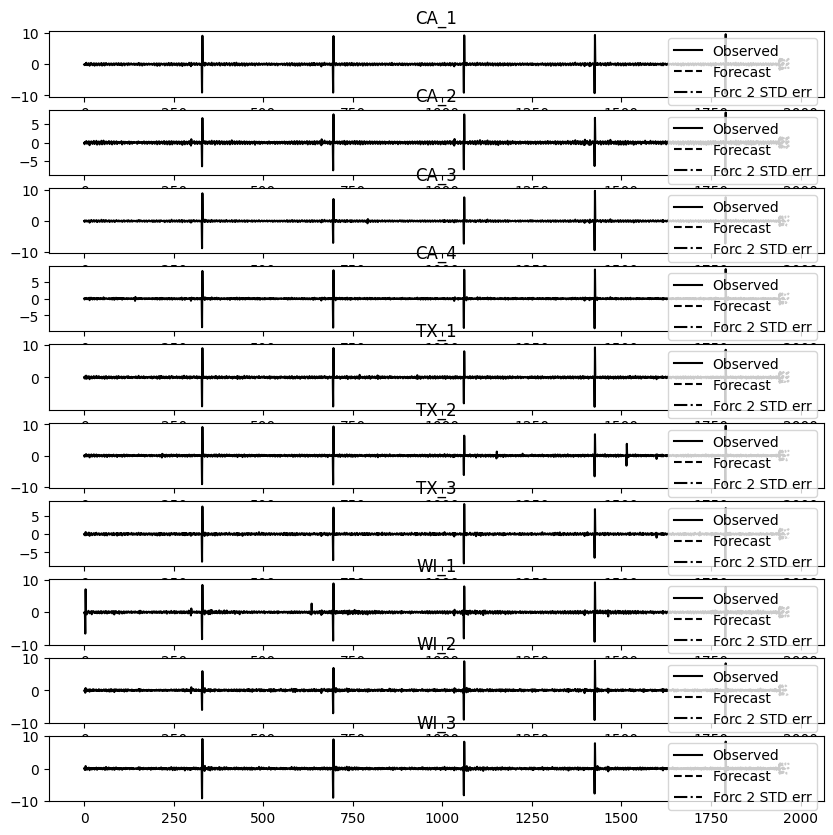

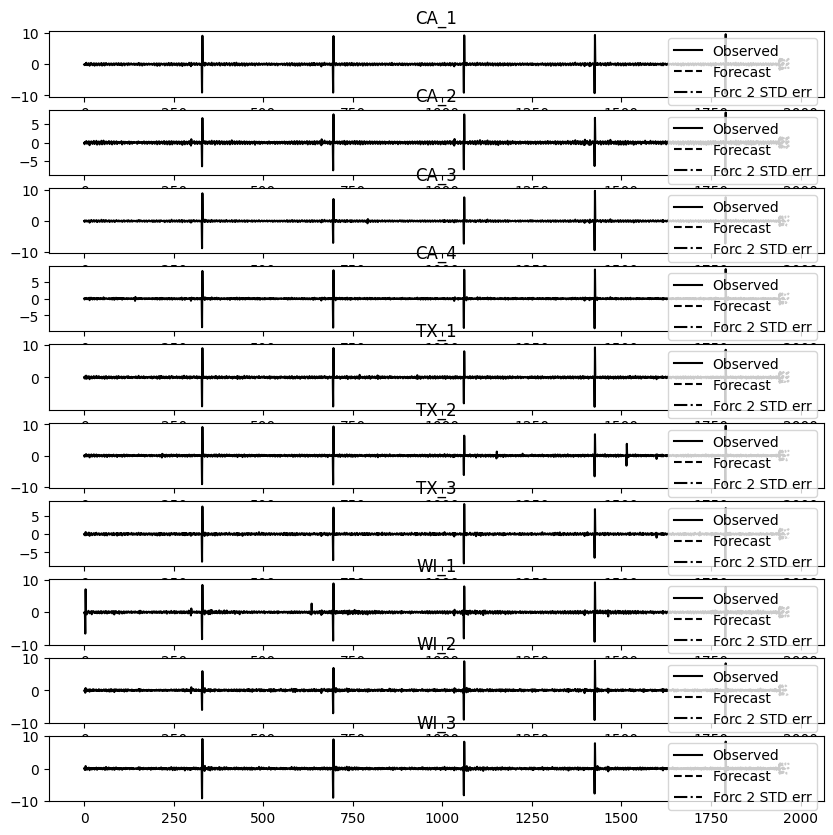

In [66]:
var_model_fit.plot_forecast(28)

In [67]:
varma_predictions

array([[-8.70443880e-03, -6.22195863e-03, -1.33658206e-03,
         2.34916274e-03, -1.29972373e-02, -1.91987499e-02,
        -1.85377210e-02, -1.10607592e-02, -1.92969641e-02,
        -1.70637924e-02],
       [ 6.77879005e-03, -1.90034914e-03, -4.69525475e-03,
        -6.00757221e-05, -1.20194510e-02, -6.67999865e-03,
        -4.45736365e-03, -1.04486808e-02, -2.29263261e-02,
        -1.68195514e-02],
       [ 3.54560696e-04, -2.01155500e-03, -1.92302437e-03,
         2.17444150e-03, -8.13282966e-03,  7.42413010e-04,
        -4.64889626e-03,  5.81365031e-03, -1.83399187e-02,
        -6.69129754e-03],
       [-9.86846691e-03, -6.05404265e-03, -9.70256210e-03,
        -5.70599158e-03,  6.98287810e-03,  1.05655772e-02,
         1.21468471e-02, -2.12050256e-03, -9.48786523e-03,
        -5.61026127e-03],
       [ 2.91460242e-03, -9.57088993e-04,  1.85743463e-03,
        -7.60461058e-03, -5.68917367e-03, -9.13700836e-03,
        -4.88236394e-03,  1.22593074e-03, -4.93032847e-03,
        -1.

In [68]:
last_actual_ma_value = varma_ma_data.iloc[[-1], :]
last_actual_ma_value = np.log(last_actual_ma_value + 1)
last_actual_ma_value

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2016-05-22,9.640443,9.704177,9.934142,9.144955,9.33718,9.508845,9.559678,9.366035,9.552124,9.308197


In [75]:
varma_processed_ma_prediction = pd.DataFrame(varma_predictions)
varma_processed_ma_prediction.columns = varma_data.columns
varma_processed_ma_prediction = np.exp(
    pd.concat([last_actual_ma_value, varma_processed_ma_prediction]).cumsum()
)
varma_processed_ma_prediction = varma_processed_ma_prediction.iloc[1:,]
varma_processed_ma_prediction

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
0,15240.911643,16284.272641,20595.036069,9389.092047,11205.755539,13222.115180,13920.806067,11556.160584,13805.567438,10841.457659
1,15344.577551,16253.356223,20498.563786,9388.528007,11071.874708,13134.085814,13858.894057,11436.042581,13492.657144,10660.634153
2,15350.019100,16220.694564,20459.182426,9408.965024,10982.194209,13143.840350,13794.615025,11502.721369,13247.458246,10589.538803
3,15199.282935,16122.790445,20261.635842,9355.430428,11059.149906,13283.448834,13963.197907,11478.355662,13122.362532,10530.295065
4,15243.647423,16107.366881,20299.305479,9284.555851,10996.411117,13162.630649,13895.190646,11492.435960,13057.824202,10358.939803
5,15298.370783,15964.981010,20362.958907,9308.618150,10829.255337,13103.566612,13713.889712,11515.129495,13134.135603,10530.938476
6,15192.304147,15900.361766,19999.427713,9147.337072,10680.835561,12840.001040,13548.253458,11515.004492,13423.216359,10547.513268
7,15344.333442,16159.388666,20075.664588,9201.578277,10716.369276,13096.880339,13683.531969,11750.587339,13553.021138,10652.709025
8,15316.948923,16223.837223,20011.007188,9135.299815,10768.650522,13141.939603,13732.547689,11968.341889,13836.685042,10809.381129
9,15380.393196,16406.112931,20199.063819,9152.188538,10928.429822,13271.477617,13981.229589,12121.108014,14430.740541,11080.664037


<Axes: >

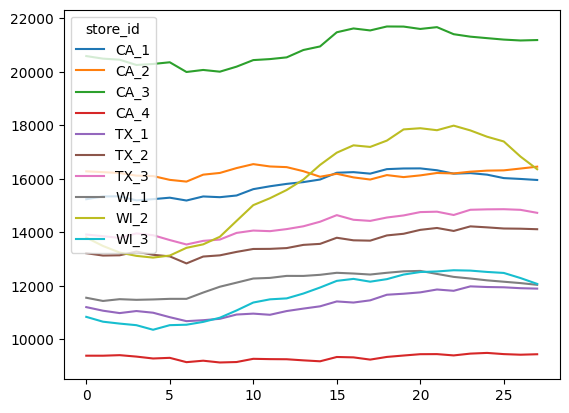

In [113]:
varma_processed_ma_prediction.plot()

In [132]:
full_varma_data = data.copy()
for i in range(0, len(varma_processed_ma_prediction)):
    current_row = varma_processed_ma_prediction.iloc[i, :]
    total = current_row * MA_PERIOD

    actual_prediction = total - full_varma_data.iloc[-6:].sum()
    actual_prediction.name = i
    actual_prediction = pd.DataFrame(actual_prediction).T
    # actual_prediction
    full_varma_data = pd.concat([full_varma_data, actual_prediction])

full_varma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-01-29 00:00:00,10933.160000,9101.520000,11679.830000,4561.590000,6586.680000,9915.780000,7597.990000,6454.720000,5451.460000,9367.880000
2011-01-30 00:00:00,9787.060000,8417.530000,12161.460000,4681.410000,6610.600000,9804.540000,7356.540000,5645.770000,4636.860000,9868.800000
2011-01-31 00:00:00,7201.380000,5320.510000,9123.860000,3637.980000,4551.970000,6651.160000,5406.700000,3640.120000,4621.580000,7551.650000
2011-02-01 00:00:00,7407.740000,5550.560000,10249.780000,3708.920000,5374.390000,6985.600000,5597.970000,2949.960000,5754.750000,7181.530000
2011-02-02 00:00:00,6566.120000,5229.720000,9538.650000,3841.140000,4347.070000,6039.050000,4069.740000,2.960000,2679.190000,4646.310000
...,...,...,...,...,...,...,...,...,...,...
23,13704.388634,13334.954357,19177.032623,8749.543084,11210.580790,12626.400398,13525.149000,10524.650583,16044.656875,10993.700913
24,13065.176885,13489.254493,18061.871690,8434.017568,9583.380215,11861.541351,12807.982415,10644.358065,14726.386143,10239.897252
25,15344.328861,16059.419983,19402.866380,8769.854694,11951.901527,14086.823822,14951.754511,11719.658277,15915.085619,12021.453304
26,19596.928740,22869.481629,24487.511370,10116.400151,12971.652013,15384.995437,15349.399204,15318.238182,16681.338089,13688.796949


<Axes: >

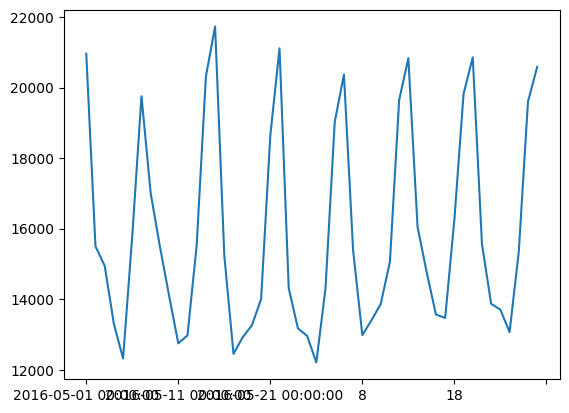

In [137]:
full_varma_data.iloc[-50:,].loc[:, "CA_1"].plot()


In [138]:
# Calculate the average daily pattern from historical data
daily_patterns = data.copy()
daily_patterns["dayofweek"] = daily_patterns.index.dayofweek
avg_daily_pattern = daily_patterns.groupby("dayofweek").mean()

# Convert MA predictions to daily values while preserving weekly patterns
full_alternate_varma_data = data.copy()
for i in range(0, len(varma_processed_ma_prediction)):
    current_ma = varma_processed_ma_prediction.iloc[i, :]

    # Get the day of week for this prediction
    prediction_date = full_alternate_varma_data.index[-1] + pd.Timedelta(days=1)
    day_of_week = prediction_date.dayofweek

    # Use historical pattern to distribute the MA value
    daily_ratio = avg_daily_pattern.loc[day_of_week] / avg_daily_pattern.mean()
    actual_prediction = current_ma * daily_ratio

    actual_prediction.name = prediction_date
    actual_prediction = pd.DataFrame(actual_prediction).T
    full_alternate_varma_data = pd.concat(
        [full_alternate_varma_data, actual_prediction]
    )

<Axes: >

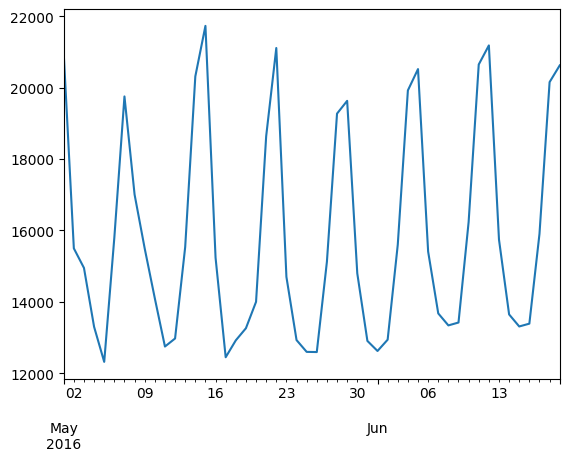

In [139]:
full_alternate_varma_data.iloc[-50:,].loc[:, "CA_1"].plot()


### Post-estimation analysis


In [160]:
# Get normality test results
varma_normality_test = varma_model_fit.test_normality()
print(varma_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     2.707e+06          31.41   0.000 20
----------------------------------------


In [166]:
varma_whiteness_test = varma_model_fit.test_whiteness(nlags=35)
print(varma_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 35 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         1374.          447.6   0.000 400
-----------------------------------------


## VARMA without Chrismas


In [182]:
calendar = read_data("calendar.csv")
events = set(calendar["event_name_1"].unique())
events.update(set(calendar["event_name_2"].unique()))
events


{'Chanukah End',
 'Christmas',
 'Cinco De Mayo',
 'ColumbusDay',
 'Easter',
 'Eid al-Fitr',
 'EidAlAdha',
 "Father's day",
 'Halloween',
 'IndependenceDay',
 'LaborDay',
 'LentStart',
 'LentWeek2',
 'MartinLutherKingDay',
 'MemorialDay',
 "Mother's day",
 'NBAFinalsEnd',
 'NBAFinalsStart',
 'NewYear',
 'OrthodoxChristmas',
 'OrthodoxEaster',
 'Pesach End',
 'PresidentsDay',
 'Purim End',
 'Ramadan starts',
 'StPatricksDay',
 'SuperBowl',
 'Thanksgiving',
 'ValentinesDay',
 'VeteransDay',
 nan}

In [185]:
calendar_chrismas = calendar[
    (calendar["event_name_1"] == "Christmas")
    | (calendar["event_name_2"] == "Christmas")
]
calendar_chrismas

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
330,2011-12-25,11148,Sunday,2,12,2011,d_331,Christmas,National,NaN,NaN,0,0,0
696,2012-12-25,11248,Tuesday,4,12,2012,d_697,Christmas,National,NaN,NaN,0,0,0
1061,2013-12-25,11348,Wednesday,5,12,2013,d_1062,Christmas,National,NaN,NaN,0,0,0
1426,2014-12-25,11447,Thursday,6,12,2014,d_1427,Christmas,National,NaN,NaN,0,0,0
1791,2015-12-25,11547,Friday,7,12,2015,d_1792,Christmas,National,NaN,NaN,0,0,0


In [223]:
# Get Christmas dates
christmas_dates = calendar_chrismas["date"]

# Filter data excluding Christmas dates
data_no_christmas = data[~data.index.isin(christmas_dates)]
data_no_christmas

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-01-29,10933.16,9101.52,11679.83,4561.59,6586.68,9915.78,7597.99,6454.72,5451.46,9367.88
2011-01-30,9787.06,8417.53,12161.46,4681.41,6610.60,9804.54,7356.54,5645.77,4636.86,9868.80
2011-01-31,7201.38,5320.51,9123.86,3637.98,4551.97,6651.16,5406.70,3640.12,4621.58,7551.65
2011-02-01,7407.74,5550.56,10249.78,3708.92,5374.39,6985.60,5597.97,2949.96,5754.75,7181.53
2011-02-02,6566.12,5229.72,9538.65,3841.14,4347.07,6039.05,4069.74,2.96,2679.19,4646.31
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,12920.62,12766.25,17780.83,8116.41,9851.97,11121.03,12078.07,9605.89,12928.75,9163.29
2016-05-19,13259.90,13432.94,18635.35,8367.57,8403.09,10474.33,11196.76,10478.86,13547.39,9660.13
2016-05-20,13999.65,15545.28,18219.23,8960.17,11296.88,13832.01,14667.00,11358.75,14139.33,11982.37
2016-05-21,18637.70,24088.59,23849.52,9768.51,13137.35,15212.81,15696.64,14614.05,15020.25,12370.23


In [224]:
varma_ma_data = data_no_christmas.rolling(MA_PERIOD).mean().dropna(how="all").fillna(0)
varma_ma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-02-04,8341.135714,6634.535714,10685.847143,3973.905714,5525.195714,7766.785714,5980.785714,4171.970000,4849.608571,8386.755714
2011-02-05,8690.027143,6819.577143,10977.537143,4035.235714,5616.621429,7752.821429,5883.680000,4371.668571,4976.931429,8877.731429
2011-02-06,8804.937143,6801.108571,11306.207143,4039.904286,5796.071429,7799.355714,5912.144286,4140.951429,4996.318571,9051.545714
2011-02-07,8876.817143,6896.335714,11708.582857,4089.502857,5925.260000,7974.047143,5985.557143,4162.210000,5005.915714,9089.714286
2011-02-08,8939.804286,6961.420000,11856.632857,4078.712857,5794.424286,7947.484286,5958.202857,4251.998571,4758.682857,9183.464286
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,15879.564286,15946.290000,20783.547143,9340.671429,11762.820000,13922.827143,14306.618571,12346.392857,16796.702857,12143.268571
2016-05-19,15920.632857,16097.975714,20944.207143,9297.730000,11453.255714,13568.770000,14036.690000,12282.620000,16272.568571,11917.720000
2016-05-20,15701.224286,16099.052857,20714.117143,9328.441429,11417.827143,13547.408571,14132.980000,12214.647143,16068.388571,12024.725714
2016-05-21,15461.702857,16438.130000,20612.295714,9248.412857,11603.162857,13679.348571,14382.274286,11896.420000,15095.634286,11499.412857


In [225]:
varma_data = np.log(varma_ma_data).diff().dropna()
varma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-02-05,0.040977,0.027509,0.026931,0.015315,0.016412,-0.001800,-0.016370,0.046756,0.025916,0.056892
2011-02-06,0.013137,-0.002712,0.029501,0.001156,0.031450,0.005984,0.004826,-0.054219,0.003888,0.019389
2011-02-07,0.008130,0.013905,0.034970,0.012202,0.022044,0.022151,0.012341,0.005121,0.001919,0.004208
2011-02-08,0.007071,0.009393,0.012565,-0.002642,-0.022328,-0.003337,-0.004581,0.021343,-0.050649,0.010261
2011-02-09,0.005919,0.005246,0.016726,-0.016676,0.019618,0.010302,0.021775,0.120752,0.066088,0.053008
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,0.001562,0.005384,-0.017680,-0.007035,-0.012555,-0.010255,-0.015112,-0.030224,-0.057586,-0.027763
2016-05-19,0.002583,0.009467,0.007700,-0.004608,-0.026670,-0.025759,-0.019048,-0.005179,-0.031702,-0.018749
2016-05-20,-0.013877,0.000067,-0.011047,0.003298,-0.003098,-0.001576,0.006836,-0.005549,-0.012627,0.008939
2016-05-21,-0.015373,0.020843,-0.004928,-0.008616,0.016102,0.009692,0.017485,-0.026398,-0.062448,-0.044669


### Stationary test

In [226]:
varma_ma_stationarity_results = test_stationarity(varma_ma_data, store_ids)
varma_ma_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-0.690225,0.849265,6.218079,0.01
CA_2,1.843373,0.998431,3.909391,0.01
CA_3,-1.493819,0.536567,5.905486,0.01
CA_4,-0.313162,0.923619,6.455313,0.01
TX_1,-0.639559,0.861790,6.052801,0.01
TX_2,-1.289414,0.634001,3.868047,0.01
TX_3,0.156518,0.969715,6.409329,0.01
WI_1,-0.407164,0.908896,6.739161,0.01
WI_2,0.049894,0.962469,5.968834,0.01


In [227]:
varma_stationarity_results = test_stationarity(varma_data, store_ids)
varma_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-17.180027,6.656302e-30,0.006665,0.1
CA_2,-15.719009,1.330981e-28,0.059273,0.1
CA_3,-18.688202,2.040044e-30,0.020693,0.1
CA_4,-13.988593,4.054925e-26,0.014497,0.1
TX_1,-19.759701,0.000000e+00,0.009118,0.1
TX_2,-13.105848,1.673194e-24,0.013829,0.1
TX_3,-13.990128,4.030547e-26,0.006846,0.1
WI_1,-12.627260,1.531981e-23,0.009942,0.1
WI_2,-14.629660,3.769746e-27,0.014719,0.1


### Modeling

In [228]:
varma_model = VAR(varma_data, freq="D")


In [229]:
# var_model_fit = varma_model.fit(maxlags=100, ic="aic")
varma_model_fit = varma_model.fit(31)

In [230]:
varma_lag_order = varma_model_fit.k_ar
varma_lag_order

31

In [231]:
varma_predictions = varma_model_fit.forecast(varma_data.values[-varma_lag_order:], 28)
varma_predictions

array([[-8.70443880e-03, -6.22195863e-03, -1.33658206e-03,
         2.34916274e-03, -1.29972373e-02, -1.91987499e-02,
        -1.85377210e-02, -1.10607592e-02, -1.92969641e-02,
        -1.70637924e-02],
       [ 6.77879005e-03, -1.90034914e-03, -4.69525475e-03,
        -6.00757221e-05, -1.20194510e-02, -6.67999865e-03,
        -4.45736365e-03, -1.04486808e-02, -2.29263261e-02,
        -1.68195514e-02],
       [ 3.54560696e-04, -2.01155500e-03, -1.92302437e-03,
         2.17444150e-03, -8.13282966e-03,  7.42413010e-04,
        -4.64889626e-03,  5.81365031e-03, -1.83399187e-02,
        -6.69129754e-03],
       [-9.86846691e-03, -6.05404265e-03, -9.70256210e-03,
        -5.70599158e-03,  6.98287810e-03,  1.05655772e-02,
         1.21468471e-02, -2.12050256e-03, -9.48786523e-03,
        -5.61026127e-03],
       [ 2.91460242e-03, -9.57088993e-04,  1.85743463e-03,
        -7.60461058e-03, -5.68917367e-03, -9.13700836e-03,
        -4.88236394e-03,  1.22593074e-03, -4.93032847e-03,
        -1.

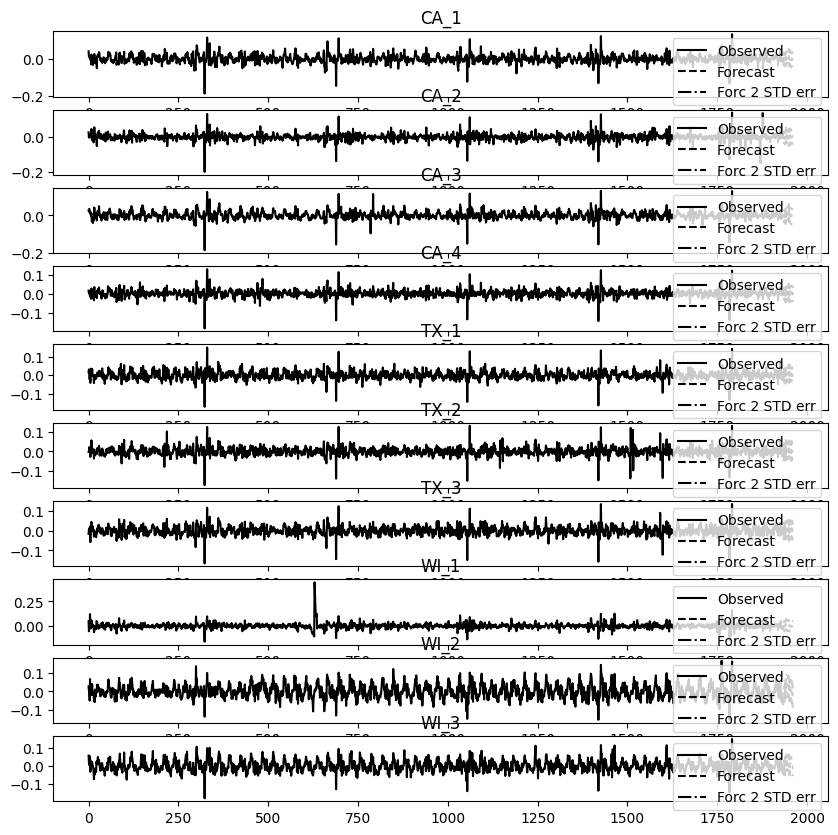

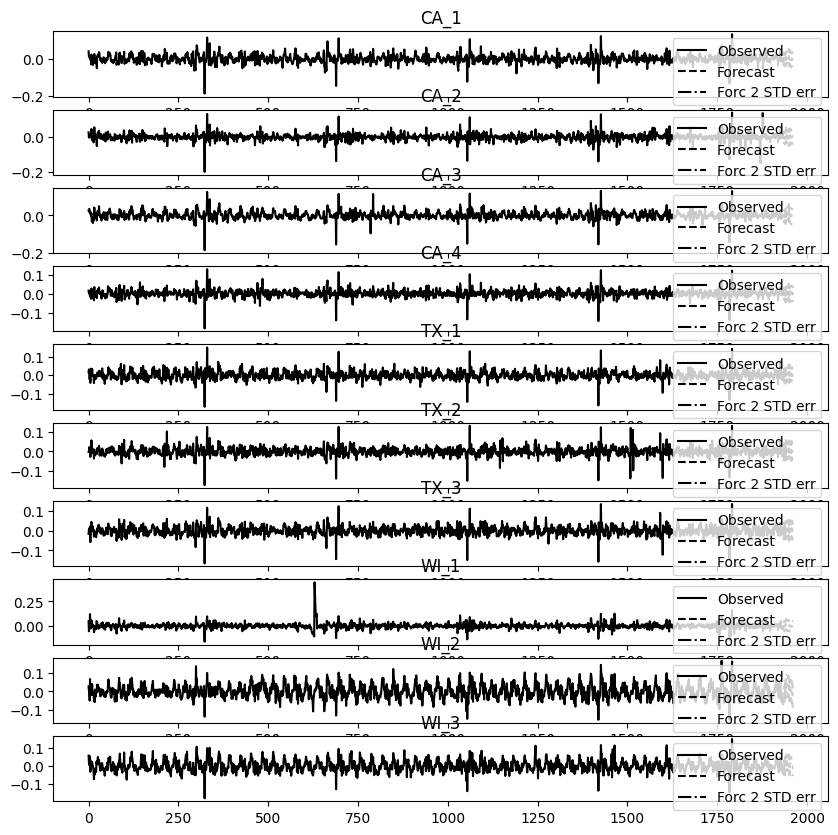

In [240]:
varma_model_fit.plot_forecast(28)

In [233]:
varma_predictions

array([[-8.70443880e-03, -6.22195863e-03, -1.33658206e-03,
         2.34916274e-03, -1.29972373e-02, -1.91987499e-02,
        -1.85377210e-02, -1.10607592e-02, -1.92969641e-02,
        -1.70637924e-02],
       [ 6.77879005e-03, -1.90034914e-03, -4.69525475e-03,
        -6.00757221e-05, -1.20194510e-02, -6.67999865e-03,
        -4.45736365e-03, -1.04486808e-02, -2.29263261e-02,
        -1.68195514e-02],
       [ 3.54560696e-04, -2.01155500e-03, -1.92302437e-03,
         2.17444150e-03, -8.13282966e-03,  7.42413010e-04,
        -4.64889626e-03,  5.81365031e-03, -1.83399187e-02,
        -6.69129754e-03],
       [-9.86846691e-03, -6.05404265e-03, -9.70256210e-03,
        -5.70599158e-03,  6.98287810e-03,  1.05655772e-02,
         1.21468471e-02, -2.12050256e-03, -9.48786523e-03,
        -5.61026127e-03],
       [ 2.91460242e-03, -9.57088993e-04,  1.85743463e-03,
        -7.60461058e-03, -5.68917367e-03, -9.13700836e-03,
        -4.88236394e-03,  1.22593074e-03, -4.93032847e-03,
        -1.

In [234]:
last_actual_ma_value = varma_ma_data.iloc[[-1], :]
last_actual_ma_value = np.log(last_actual_ma_value + 1)
last_actual_ma_value

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2016-05-22,9.640443,9.704177,9.934142,9.144955,9.33718,9.508845,9.559678,9.366035,9.552124,9.308197


In [235]:
varma_processed_ma_prediction = pd.DataFrame(varma_predictions)
varma_processed_ma_prediction.columns = varma_data.columns
varma_processed_ma_prediction = np.exp(
    pd.concat([last_actual_ma_value, varma_processed_ma_prediction]).cumsum()
)
varma_processed_ma_prediction = varma_processed_ma_prediction.iloc[1:,]
varma_processed_ma_prediction

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
0,15240.911643,16284.272641,20595.036069,9389.092047,11205.755539,13222.115180,13920.806067,11556.160584,13805.567438,10841.457659
1,15344.577551,16253.356223,20498.563786,9388.528007,11071.874708,13134.085814,13858.894057,11436.042581,13492.657144,10660.634153
2,15350.019100,16220.694564,20459.182426,9408.965024,10982.194209,13143.840350,13794.615025,11502.721369,13247.458246,10589.538803
3,15199.282935,16122.790445,20261.635842,9355.430428,11059.149906,13283.448834,13963.197907,11478.355662,13122.362532,10530.295065
4,15243.647423,16107.366881,20299.305479,9284.555851,10996.411117,13162.630649,13895.190646,11492.435960,13057.824202,10358.939803
5,15298.370783,15964.981010,20362.958907,9308.618150,10829.255337,13103.566612,13713.889712,11515.129495,13134.135603,10530.938476
6,15192.304147,15900.361766,19999.427713,9147.337072,10680.835561,12840.001040,13548.253458,11515.004492,13423.216359,10547.513268
7,15344.333442,16159.388666,20075.664588,9201.578277,10716.369276,13096.880339,13683.531969,11750.587339,13553.021138,10652.709025
8,15316.948923,16223.837223,20011.007188,9135.299815,10768.650522,13141.939603,13732.547689,11968.341889,13836.685042,10809.381129
9,15380.393196,16406.112931,20199.063819,9152.188538,10928.429822,13271.477617,13981.229589,12121.108014,14430.740541,11080.664037


<Axes: >

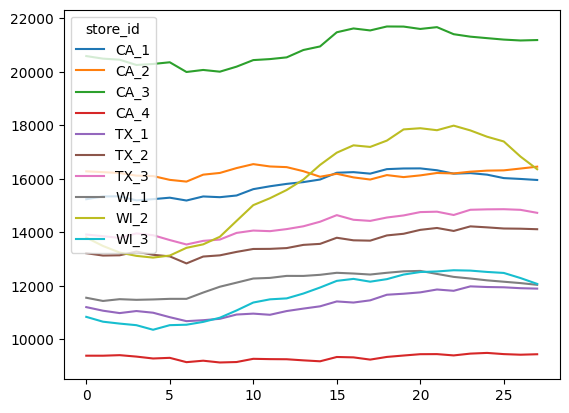

In [236]:
varma_processed_ma_prediction.plot()

In [237]:
full_varma_data = data.copy()
for i in range(0, len(varma_processed_ma_prediction)):
    current_row = varma_processed_ma_prediction.iloc[i, :]
    total = current_row * MA_PERIOD

    actual_prediction = total - full_varma_data.iloc[-6:].sum()
    actual_prediction.name = i
    actual_prediction = pd.DataFrame(actual_prediction).T
    # actual_prediction
    full_varma_data = pd.concat([full_varma_data, actual_prediction])

full_varma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-01-29,10933.160000,9101.520000,11679.830000,4561.590000,6586.680000,9915.780000,7597.990000,6454.720000,5451.460000,9367.880000
2011-01-30,9787.060000,8417.530000,12161.460000,4681.410000,6610.600000,9804.540000,7356.540000,5645.770000,4636.860000,9868.800000
2011-01-31,7201.380000,5320.510000,9123.860000,3637.980000,4551.970000,6651.160000,5406.700000,3640.120000,4621.580000,7551.650000
2011-02-01,7407.740000,5550.560000,10249.780000,3708.920000,5374.390000,6985.600000,5597.970000,2949.960000,5754.750000,7181.530000
2011-02-02,6566.120000,5229.720000,9538.650000,3841.140000,4347.070000,6039.050000,4069.740000,2.960000,2679.190000,4646.310000
...,...,...,...,...,...,...,...,...,...,...
23,13704.388634,13334.954357,19177.032623,8749.543084,11210.580790,12626.400398,13525.149000,10524.650583,16044.656875,10993.700913
24,13065.176885,13489.254493,18061.871690,8434.017568,9583.380215,11861.541351,12807.982415,10644.358065,14726.386143,10239.897252
25,15344.328861,16059.419983,19402.866380,8769.854694,11951.901527,14086.823822,14951.754511,11719.658277,15915.085619,12021.453304
26,19596.928740,22869.481629,24487.511370,10116.400151,12971.652013,15384.995437,15349.399204,15318.238182,16681.338089,13688.796949


<Axes: >

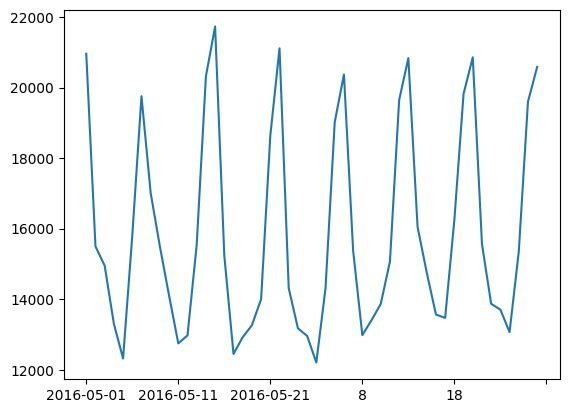

In [238]:
full_varma_data.iloc[-50:,].loc[:, "CA_1"].plot()


In [239]:
# Calculate the average daily pattern from historical data
daily_patterns = data.copy()
daily_patterns["dayofweek"] = daily_patterns.index.dayofweek
avg_daily_pattern = daily_patterns.groupby("dayofweek").mean()

# Convert MA predictions to daily values while preserving weekly patterns
full_alternate_varma_data = data.copy()
for i in range(0, len(varma_processed_ma_prediction)):
    current_ma = varma_processed_ma_prediction.iloc[i, :]

    # Get the day of week for this prediction
    prediction_date = full_alternate_varma_data.index[-1] + pd.Timedelta(days=1)
    day_of_week = prediction_date.dayofweek

    # Use historical pattern to distribute the MA value
    daily_ratio = avg_daily_pattern.loc[day_of_week] / avg_daily_pattern.mean()
    actual_prediction = current_ma * daily_ratio

    actual_prediction.name = prediction_date
    actual_prediction = pd.DataFrame(actual_prediction).T
    full_alternate_varma_data = pd.concat(
        [full_alternate_varma_data, actual_prediction]
    )

AttributeError: 'Index' object has no attribute 'dayofweek'

<Axes: >

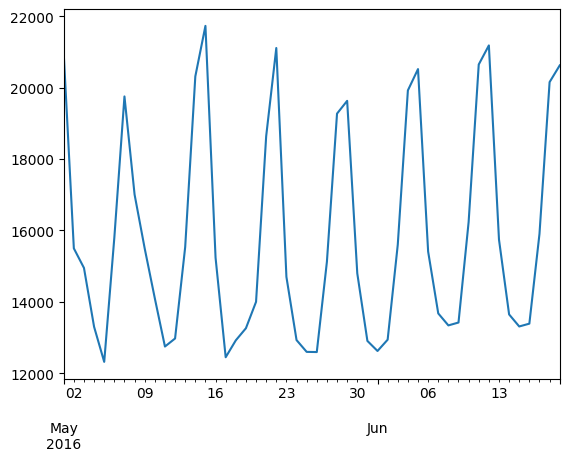

In [ ]:
full_alternate_varma_data.iloc[-50:,].loc[:, "CA_1"].plot()


### Post-estimation analysis


In [241]:
# Get normality test results
varma_normality_test = varma_model_fit.test_normality()
print(varma_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     2.707e+06          31.41   0.000 20
----------------------------------------


In [242]:
varma_whiteness_test = varma_model_fit.test_whiteness(nlags=35)
print(varma_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 35 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         1374.          447.6   0.000 400
-----------------------------------------
